**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)
print("Inputs Tensor:\n", inputs_tensor)
print("Targets Tensor:\n", targets_tensor)

Inputs Tensor:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
Targets Tensor:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [4]:
torch.random.manual_seed(1)

In [5]:
num_features = 3
w = torch.randn(num_features, 1)
b = torch.randn(1)
print("Weights w:\n", w)
print("Bias b:\n", b)

Weights w:
 tensor([[0.6614],
        [0.2669],
        [0.0617]])
Bias b:
 tensor([0.6213])


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [6]:
def model(x, w, b):
  z = torch.matmul(x, w) + b
  y_hat = 1 / (1 + torch.exp(-z))
  return y_hat

predictions = model(inputs_tensor, w, b)
print(predictions)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


Всі передбачення = 1. Так може бути тому, що модель ще не навчена

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [7]:
def binary_cross_entropy(predicted_probs, true_labels):
  eps = 1e-5
  predicted_probs = torch.clamp(predicted_probs, eps, 1 - eps)
  bce_loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
  return torch.mean(bce_loss)

loss = binary_cross_entropy(predictions, targets_tensor)
print("Binary Cross-Entropy Loss:", loss.item())

Binary Cross-Entropy Loss: 4.604633331298828


5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [8]:
w = torch.randn(3, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
predictions = model(inputs_tensor, w, b)
loss = binary_cross_entropy(predictions, targets_tensor)
loss.backward()
print("Gradients for w:\n", w.grad)
print("Gradients for b:\n", b.grad)

Gradients for w:
 tensor([[nan],
        [nan],
        [nan]])
Gradients for b:
 tensor([nan])


**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [9]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

predictions_new = model(inputs_tensor, w.T, b)
loss_new = binary_cross_entropy(predictions_new, targets_tensor)
loss_new.backward()
print("Predictions:\n", predictions_new)
print("\nLoss:\n", loss_new.item())
print("\nGradients для w:\n", w.grad)
print("\nGradients для b:\n", b.grad)

Predictions:
 tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)

Loss:
 0.6829456686973572

Gradients для w:
 tensor([[ -5.4417, -18.9853, -10.0682]])

Gradients для b:
 tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [17]:
# генерація прогнозів
preds = model(inputs_tensor, w.T, b)
print(preds)

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)


In [18]:
# обчислення втрат
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()
targets_torch = torch.from_numpy(targets).to(preds.dtype)
loss = mse(preds, targets_torch)
print(loss)

tensor(0.2449, grad_fn=<DivBackward0>)


In [19]:
# Обчислення градієнтів
loss.backward()
print("\nGradients для w:\n", w.grad)


Gradients для w:
 tensor([[-10.8641, -37.9264, -20.1134]])


In [21]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
print(w)

tensor([[0.0008, 0.0006, 0.0003]], requires_grad=True)


In [27]:
preds = model(inputs_tensor, w.T, b)
targets_torch = torch.from_numpy(targets).to(preds.dtype)
loss = mse(preds, targets_torch)
print(loss)

tensor(0.2402, grad_fn=<DivBackward0>)


In [29]:
# Тренування протягом 1000 епох
for i in range(1000):
    preds = model(inputs_tensor, w.T, b)
    targets_torch = torch.from_numpy(targets).to(preds.dtype)
    loss = mse(preds, targets_torch)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

preds = model(inputs_tensor, w.T, b)
targets_torch = torch.from_numpy(targets).to(preds.dtype)
loss = mse(preds, targets_torch)
print(loss)

tensor(0.1269, grad_fn=<DivBackward0>)


In [30]:
preds

tensor([[0.5716],
        [0.6329],
        [0.8222],
        [0.2982],
        [0.7709]], grad_fn=<MulBackward0>)

In [31]:
targets_torch

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])

4 передбачення із 5 є точними (точність 80%)

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [54]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [55]:
from torch.utils.data import TensorDataset
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)
train_ds = TensorDataset(inputs_tensor, targets_tensor)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [1.],
         [1.]]))

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [56]:
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[102.,  43.,  37.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [102.,  43.,  37.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [1.]])]

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [57]:
import torch.nn.functional as F
import torch.nn as nn

class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = LogReg()

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [58]:
opt = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = F.binary_cross_entropy
inputs_tensor = torch.from_numpy(inputs).float()
inputs_tensor = (inputs_tensor - inputs_tensor.mean(0)) / inputs_tensor.std(0) # нормалізація
targets_tensor = torch.from_numpy(targets).float()
preds = model(inputs_tensor)
loss_value = loss_fn(preds, targets_tensor)
print(loss_value.item())

0.7763237357139587


Моделі не вдалося навчитися, оскільки значення loss стало вище

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

Epoch [10/1000], Loss: 0.6614
Epoch [20/1000], Loss: 0.5628
Epoch [30/1000], Loss: 0.4864
Epoch [40/1000], Loss: 0.4263
Epoch [50/1000], Loss: 0.3787
Epoch [60/1000], Loss: 0.3407
Epoch [70/1000], Loss: 0.3089
Epoch [80/1000], Loss: 0.2828
Epoch [90/1000], Loss: 0.2609
Epoch [100/1000], Loss: 0.2420
Epoch [110/1000], Loss: 0.2257
Epoch [120/1000], Loss: 0.2115
Epoch [130/1000], Loss: 0.1990
Epoch [140/1000], Loss: 0.1879
Epoch [150/1000], Loss: 0.1779
Epoch [160/1000], Loss: 0.1690
Epoch [170/1000], Loss: 0.1609
Epoch [180/1000], Loss: 0.1536
Epoch [190/1000], Loss: 0.1469
Epoch [200/1000], Loss: 0.1407
Epoch [210/1000], Loss: 0.1350
Epoch [220/1000], Loss: 0.1298
Epoch [230/1000], Loss: 0.1250
Epoch [240/1000], Loss: 0.1205
Epoch [250/1000], Loss: 0.1163
Epoch [260/1000], Loss: 0.1124
Epoch [270/1000], Loss: 0.1087
Epoch [280/1000], Loss: 0.1053
Epoch [290/1000], Loss: 0.1021
Epoch [300/1000], Loss: 0.0990
Epoch [310/1000], Loss: 0.0962
Epoch [320/1000], Loss: 0.0935
Epoch [330/1000],

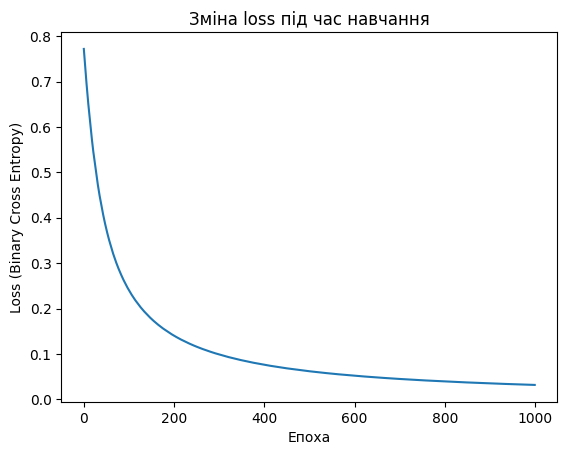

In [59]:
import matplotlib.pyplot as plt

# Нормалізація
inputs_tensor = torch.from_numpy(inputs).float()
inputs_tensor = (inputs_tensor - inputs_tensor.mean(0)) / inputs_tensor.std(0)
targets_tensor = torch.from_numpy(targets).float()

train_ds = TensorDataset(inputs_tensor, targets_tensor)
train_dl = DataLoader(train_ds, batch_size=5, shuffle=True)

def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

losses = fit_return_loss(1000, model, loss_fn, opt, train_dl)
plt.plot(losses)
plt.xlabel("Епоха")
plt.ylabel("Loss (Binary Cross Entropy)")
plt.title("Зміна loss під час навчання")
plt.show()


In [62]:
final_preds = model(inputs_tensor)
print("Фінальні передбачення:")
print(final_preds.detach().numpy())

print("Таргети:")
print(targets_tensor.numpy())

Фінальні передбачення:
[[0.05338515]
 [0.9448346 ]
 [0.98651636]
 [0.01051226]
 [0.977693  ]
 [0.05338515]
 [0.9448346 ]
 [0.98651636]
 [0.01051226]
 [0.977693  ]
 [0.05338515]
 [0.9448346 ]
 [0.98651636]
 [0.01051226]
 [0.977693  ]]
Таргети:
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]
